<h2><font color="#004D7F" size=5>Módulo 1: Modelos múltiples</font></h2>



<h1><font color="#004D7F" size=6> 2. Códigos de salida con corrección de errores </font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Aprendizaje Automático II</font><br>
<font color="#004D7F" size=3>Universidad Nacional de Educación a Distancia</font>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>


* [1. Códigos de salida con corrección de errores](#section1)
* [2. Evaluar clasificadores ECOC](#section3)
    * [2.1. Dataset](#section21)
    * [2.2. Evaluación ECOC](#section22)
    * [2.3. ECOC Predicciones](#section23)
* [3. Ajustar el número de bits por clase](#section3)
* [Ejercicios](#sectionEj)

---

<a id="section0"></a>
# <font color="#004D7F">0. Contexto</font>

El método de códigos de salida de corrección de errores es una técnica que permite replantear un problema de clasificación multiclase como problemas de clasificación binaria múltiple. A diferencia de los métodos OvR y OvO, la técnica de códigos de salida de corrección de errores permite codificar cada clase como un número arbitrario de problemas de clasificación binaria. Después de completar este tutorial, sabrá:
- Los códigos de salida con corrección de errores es una técnica para utilizar modelos de clasificación binaria en clasificación multiclase.
- Cómo ajustar, evaluar y utilizar modelos de clasificación con códigos de salida con corrección de errores.
- Cómo ajustar y evaluar diferentes valores para el número de bits por hiperparámetro de clase utilizado por códigos de salida con corrección de errores.

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Códigos de salida con corrección de errores</font>

Un enfoque relacionado a OvR y OvO consiste en preparar una codificación binaria (por ejemplo, una cadena de bits) para representar cada clase del problema:
- Cada bit de la cadena se puede predecir mediante un problema de clasificación binaria independiente. 
- Arbitrariamente, se pueden elegir codificaciones de longitud para un problema de clasificación multiclase determinado. 
- Cada modelo recibe el patrón de entrada completo y solo predice una posición en la cadena de salida. 
- Durante el entrenamiento, cada modelo se puede entrenar para producir la salida 0 o 1 correcta para la tarea de clasificación binaria. 
- Luego se puede hacer una predicción para nuevos ejemplos utilizando cada modelo para hacer una predicción de la entrada para crear la cadena binaria y luego comparar la cadena binaria con la codificación conocida de cada clase. 
- Luego se elige como salida la codificación de clase que tiene la menor distancia a la predicción.

<figure><center>
  <img src="datos/multiclass.png" width="650" height="650" alt="Gráfica">
  <figcaption><blockquote>Gráfico con los diferentes algoritmos multiclase y multioutput en Sklearn. Extraída de la documentación de Scikit-learn</blockquote></figcaption>
</center></figure>

Es un enfoque interesante que permite que la representación de clases sea más elaborada de lo necesario (quizás sobredeterminada) en comparación con One-hot enconding quee introduce redundancia en la representación y el modelado del problema. Esto es intencional ya que los bits adicionales en la representación actúan como códigos de corrección de errores para arreglar, corregir o mejorar la predicción.

```text
... la idea es que los bits redundantes de "corrección de errores" permitan algunas imprecisiones y puedan mejorar el rendimiento.
        -- Página 606, The Elements of Statistical Learning, 2016.
```

```text
Los códigos de salida con corrección de errores (ECOC) son un enfoque simple pero poderoso para abordar un problema de múltiples clases basado en la combinación de clasificadores binarios.
        -- Página 90, Ensemble Methods, 2012.
```

<figure><center>
  <img src="datos/ECOC.png" width="450" height="450" alt="Gráfica">
  <figcaption><blockquote>Gráfico de cómo sería un modelo ECOC. Extraída del artículo "Anatomical Pattern Analysis for Decoding Visual Stimuli in Human Brains"</blockquote></figcaption>
</center></figure>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Más información__: Las diferentes clases para poder utilizar multiclase en scikit-learn se encuentran detalladas en la misma página de información de la librería. [Pulse aquí](https://qu4nt.github.io/sklearn-doc-es/modules/multiclass.html)
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section2"></a> 
# <font color="#004D7F"> 2. Evaluar clasificadores ECOC</font>

La biblioteca scikit-learn proporciona una implementación de ECOC a través de la clase `OutputCodeClassifier`. 
- Toma como argumento el modelo a utilizar para ajustar cada clasificador binario, y se puede utilizar cualquier modelo de aprendizaje automático. 
- También proporciona el argumento `code_size` que especifica el tamaño de la codificación para las clases como un múltiplo del número de clases, i.e., el número de bits a codificar para cada etiqueta de clase.

Si queremos una codificación con cadenas de bits con una longitud de 6 bits y tenemos 3 clases, entonces podemos especificar el tamaño de codificación como 2:

$$
Encoding\ Lenght = Code\ Size \times Total\ Classes = 2 \times 3 = 6
$$

El siguiente ejemplo demuestra cómo definir un ejemplo de `OutputCodeClassifier` con 2 bits por clase y usando un modelo `LogisticRegression` para cada bit en la codificación.

```python
    ...
    # Definir el algoritmo
    model = LogisticRegression()
    # Definir el modelo ECOC
    ecoc = OutputCodeClassifier(model, code_size=2, random_state=1)
```

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [OutputCodeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OutputCodeClassifier.html).
</div>

<a id="section21"></a> 
## <font color="#004D7F"> 2.1. Dataset</font>

- La clase `OutputCodeClassifier` selecciona una codificación de cadena de bits aleatoria para cada clase.
- Podemos explorar el uso de `OutputCodeClassifier` en un problema de clasificación sintética multiclase.
- Usar la función `make_classification()` para definir un problema de clasificación multiclase con 1000 ejemplos, 20 características de entrada y 3 clases. 

In [1]:
from collections import Counter
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1, n_classes=3)
print(X.shape, y.shape)
print(Counter(y))

(1000, 20) (1000,)
Counter({2: 335, 1: 333, 0: 332})


<a id="section22"></a> 
## <font color="#004D7F"> 2.2. Evaluación ECOC </font>

- Usamos una regresión logística con 2 bits por clase como definimos anteriormente. 
- Evaluamos mediante una validación cruzada estratificada repetida de _k_ veces con 3 repeticiones y 10 pliegues.
- Resumiremos el rendimiento del modelo utilizando la media y la desviación estándar del accuracy de la clasificación en todas las repeticiones y pliegues.

In [2]:
X[400]

array([-1.8681541 , -3.93439979,  4.04775024, -0.91086157, -2.17419471,
       -4.17570004,  7.25105149,  2.81917585,  1.24464982, -5.36495357,
        1.67203461, -4.30233061, -4.37465073,  1.91899055, -0.15868534,
        2.11114792, -8.77453615, -3.69045932,  0.75409695, -2.55639459])

In [3]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OutputCodeClassifier

# definir el modelo base
model = LogisticRegression()
# definir el modelo ecoc
ecoc = OutputCodeClassifier(model, code_size=2, random_state=1)
# definir el procedimiento de evaluación
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluar el modelo y recoger las puntuaciones
n_scores = cross_val_score(ecoc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# resumir el rendimiento
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.766 (0.037)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section23"></a> 
## <font color="#004D7F"> 2.3. ECOC Predicciones </font>

Ajustemos el modelo a todos los datos disponibles y lo utilicemos para hacer predicciones sobre datos nuevos. 

In [4]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OutputCodeClassifier

# definir el modelo de clasificación binaria
model = LogisticRegression()
# definir el modelo ecoc
ecoc = OutputCodeClassifier(model, code_size=2, random_state=1)
# ajustar el modelo a todo el conjunto de datos
ecoc.fit(X, y)
# hacer una única predicción
row = [-1.8681541 , -3.93439979,  4.04775024, -0.91086157, -2.17419471,
       -4.17570004,  7.25105149,  2.81917585,  1.24464982, -5.36495357,
        1.67203461, -4.30233061, -4.37465073,  1.91899055, -0.15868534,
        2.11114792, -8.77453615, -3.69045932,  0.75409695, -2.55639459]
yhat = ecoc.predict([row])
# imprimir la predicción
print('Clase predicha: %d' % yhat[0])

Clase predicha: 1


---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section3"></a> 
# <font color="#004D7F"> 3. Ajustar el número de bits por clase </font>

El hiperparámetro clave para el modelo ECOC es la codificación de etiquetas de clase. Esto incluye propiedades como:
- La elección de la representación (bits, números reales, etc.)
- La codificación de cada etiqueta de clase (aleatoria, etc.)
- La longitud de la representación (número de bits, etc.)
- Cómo se asignan las predicciones a las clases (distancia, etc.)

La implementación de scikit-learn de `OutputCodeClassifier` actualmente no proporciona mucho control sobre estos elementos. El elemento sobre el que sí da control es el número de bits (`code_size`) utilizados para codificar cada etiqueta de clase.

Veamos un ejemplo, podemos realizar un GridSearchCV en diferentes números de bits por etiqueta de clase y comparar los resultados. 

Primero, podemos definir una función para crear y devolver el conjunto de datos.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [OutputCodeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OutputCodeClassifier.html).
</div>

In [ ]:
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1, n_classes=3)
	return X, y

- Luego podemos definir una función que creará un diccionario de modelos para evaluar.
- Cada modelo será un ejemplo de `OutputCodeClassifier` utilizando un `LogisticRegression` para cada problema de clasificación binaria. 
- Configuraremos `code_size` de cada modelo para que sea diferente, con valores que van del 1 al 20.

In [6]:
# obtener una lista de modelos para evaluar
def get_models():
	models = dict()
	# enumerar el número de bits de 1 a 20
	for i in range(1,21):
		# crear modelo
		model = LogisticRegression(n_jobs=-1)
		# crear un clasificador de códigos de salida con corrección de errores
		models[str(i)] = OutputCodeClassifier(model, code_size=i, random_state=1)
	return models

Podemos evaluar cada modelo utilizando `RepeatedStratifiedKFold` para dar una muestra de puntuaciones de accuracy de clasificación.

In [7]:
# evaluar un modelo determinado mediante validación cruzada
def evaluate_model(model, X, y):
	# definir el procedimiento de evaluación
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluar el modelo y recoger las puntuaciones
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

Informamos la media y la desviación estándar de las puntuaciones para cada configuración y representamos las distribuciones como Boxplots.

>1 0.545 (0.032)
>2 0.766 (0.037)
>3 0.776 (0.036)
>4 0.769 (0.035)
>5 0.782 (0.037)
>6 0.780 (0.037)
>7 0.776 (0.039)
>8 0.775 (0.036)
>9 0.782 (0.038)
>10 0.779 (0.036)
>11 0.770 (0.033)
>12 0.777 (0.037)
>13 0.781 (0.037)
>14 0.779 (0.039)
>15 0.771 (0.033)
>16 0.769 (0.035)
>17 0.785 (0.034)
>18 0.776 (0.038)
>19 0.776 (0.034)
>20 0.780 (0.038)


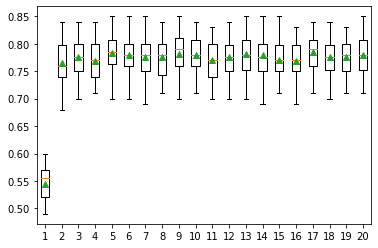

In [8]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OutputCodeClassifier
from matplotlib import pyplot

# definir conjunto de datos
X, y = get_dataset()
# obtener los modelos para evaluar
models = get_models()
# evaluar los modelos y almacenar los resultados
results, names = list(), list()
for name, model in models.items():
	# evaluar el modelo
	scores = evaluate_model(model, X, y)
	# almacenar las puntuaciones
	results.append(scores)
	names.append(name)
	# resumir los resultados a lo largo del camino
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# rendimiento del modelo de trazado para comparación
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

En este caso, podemos ver que quizás 5 o 6 bits por clase dan como resultado el mejor rendimiento con puntuaciones medias de accuracy informadas de aproximadamente 78,2% y 78,0%, respectivamente. También vemos buenos resultados para 9, 13, 17 y 20 bits por clase, donde quizás 17 bits por clase dan el mejor resultado de alrededor del 78,5 por ciento.

Finalmente, se crea una figura Boxplot para las puntuaciones de accuracy para cada configuración del modelo. Podemos ver que, además de un valor de 1, el número de bits por clase ofrece resultados similares en términos de dispersión y puntuaciones accuracy medio que se agrupan alrededor del 77%. Esto sugiere que el enfoque es razonablemente estable en todas las configuraciones.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="sectionEj"></a>
<h3><font color="#004D7F" size=6> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicios</font></h3>

Se proponen las siguientes actividades para consolidar el aprendizaje.

# <font color="#004D7F" size=5>Ejercicio 1</font>
__Hiperparámetros__. ¿Qué otros hiperparámetros se pueden utilizar? Indaga y descubra más hiperparámetros y evalúe su uso.

>1 0.550 (0.034)
>2 0.772 (0.041)
>3 0.775 (0.039)
>4 0.774 (0.033)
>5 0.783 (0.037)
>6 0.776 (0.038)
>7 0.767 (0.041)
>8 0.776 (0.037)
>9 0.778 (0.039)
>10 0.774 (0.035)
>11 0.771 (0.034)
>12 0.777 (0.041)
>13 0.775 (0.037)
>14 0.775 (0.041)
>15 0.775 (0.032)
>16 0.767 (0.034)
>17 0.779 (0.040)
>18 0.776 (0.037)
>19 0.774 (0.037)
>20 0.775 (0.034)


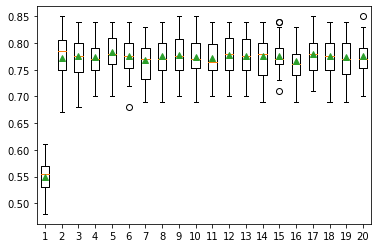

In [9]:
# Función para obtener el dataset
def get_dataset():
  X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1, n_classes=3)
  return X, y

# Función para obtener una lista de modelos para evaluar
def get_models():
  models = dict()
  # Enumerar el número de bits de 1 a 20
  for i in range(1, 21):
    # Crear modelo con class_weight='balanced'
    model = LogisticRegression(class_weight='balanced', n_jobs=-1)
    # Crear un clasificador de códigos de salida con corrección de errores
    models[str(i)] = OutputCodeClassifier(model, code_size=i, random_state=1)
  return models

# Función para evaluar un modelo determinado mediante validación cruzada
def evaluate_model(model, X, y):
  # Definir el procedimiento de evaluación
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # Evaluar el modelo y recoger las puntuaciones
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

# Definir conjunto de datos
X, y = get_dataset()
# Obtener los modelos para evaluar
models = get_models()
# Evaluar los modelos y almacenar los resultados
results, names = list(), list()
for name, model in models.items():
  # Evaluar el modelo
  scores = evaluate_model(model, X, y)
  # Almacenar las puntuaciones
  results.append(scores)
  names.append(name)
  # Resumir los resultados a lo largo del camino
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# Rendimiento del modelo de trazado para comparación
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# <font color="#004D7F" size=5>Ejercicio 2</font>
__Más conjuntos de datos__. Busque un dataset original y verdadero (que no sea sintético) y evalúe el uso de los conceptos vistos en esta unidad. Los conjuntos de datos en pueden ser obtenidos del [repositorio de aprendizaje automático de UCI](https://archive.ics.uci.edu/).

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']
(178, 13) (178,)
>1 0.695 (0.049)
>2 0.933 (0.061)
>3 0.953 (0.048)
>4 0.955 (0.051)
>5 0.946 (0.059)
>6 0.953 (0.048)
>7 0.951 (0.049)
>8 0.951 (0.052)
>9 0.957 (0.047)
>10 0.955 (0.051)
>11 0.957 (0.047)
>12 0.953 (0.053)
>13 0.957 (0.047)
>14 0.951 (0.052)
>15 0.955 (0.051)
>16 0.953 (0.048)
>17 0.953 (0.050)
>18 0.953 (0.048)
>19 0.951 (0.052)
>20 0.955 (0.051)


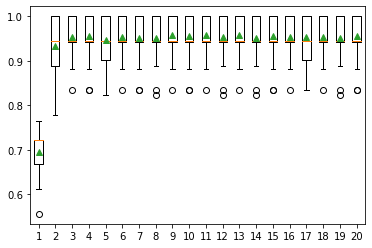

In [10]:
from sklearn.datasets import load_wine

# Cargar el dataset
data = load_wine()

# Ver las características del dataset
print(data.feature_names)

# Ver las etiquetas del dataset
print(data.target_names)

# Acceder a los datos y las etiquetas
X = data.data
y = data.target

# Ver las dimensiones de los datos
print(X.shape, y.shape)

# Obtener los modelos para evaluar
models = get_models()
# Evaluar los modelos y almacenar los resultados
results, names = list(), list()
for name, model in models.items():
  # Evaluar el modelo
  scores = evaluate_model(model, X, y)
  # Almacenar las puntuaciones
  results.append(scores)
  names.append(name)
  # Resumir los resultados a lo largo del camino
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# Rendimiento del modelo de trazado para comparación
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# <font color="#004D7F" size=5>Ejercicio 3</font>
__Clasificadores__. Evalué todo los ejercicios anteriores con el uso de clasificadores distintos a los vistos en la unidad, i.e., diferentes a LoR, CART y NB.

>1 0.450 (0.053)
>2 0.465 (0.090)
>3 0.465 (0.090)
>4 0.459 (0.091)
>5 0.465 (0.090)
>6 0.487 (0.094)
>7 0.508 (0.086)
>8 0.487 (0.094)
>9 0.498 (0.089)
>10 0.476 (0.084)
>11 0.476 (0.084)
>12 0.476 (0.084)
>13 0.476 (0.084)
>14 0.514 (0.104)
>15 0.498 (0.089)
>16 0.498 (0.089)
>17 0.498 (0.089)
>18 0.487 (0.094)
>19 0.487 (0.094)
>20 0.487 (0.094)


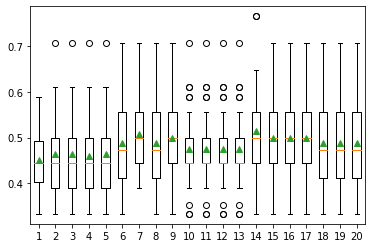

In [11]:
from sklearn.gaussian_process import GaussianProcessClassifier

# Función para obtener una lista de modelos para evaluar
def get_models():
  models = dict()
  # Enumerar el número de bits de 1 a 20
  for i in range(1, 21):
    # Crear modelo
    model = GaussianProcessClassifier()
    # Crear un clasificador de códigos de salida con corrección de errores
    models[str(i)] = OutputCodeClassifier(model, code_size=i, random_state=1)
  return models

# Obtener los modelos para evaluar
models = get_models()
# Evaluar los modelos y almacenar los resultados
results, names = list(), list()
for name, model in models.items():
  # Evaluar el modelo
  scores = evaluate_model(model, X, y)
  # Almacenar las puntuaciones
  results.append(scores)
  names.append(name)
  # Resumir los resultados a lo largo del camino
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# Rendimiento del modelo de trazado para comparación
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

---

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>